In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2],0)
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

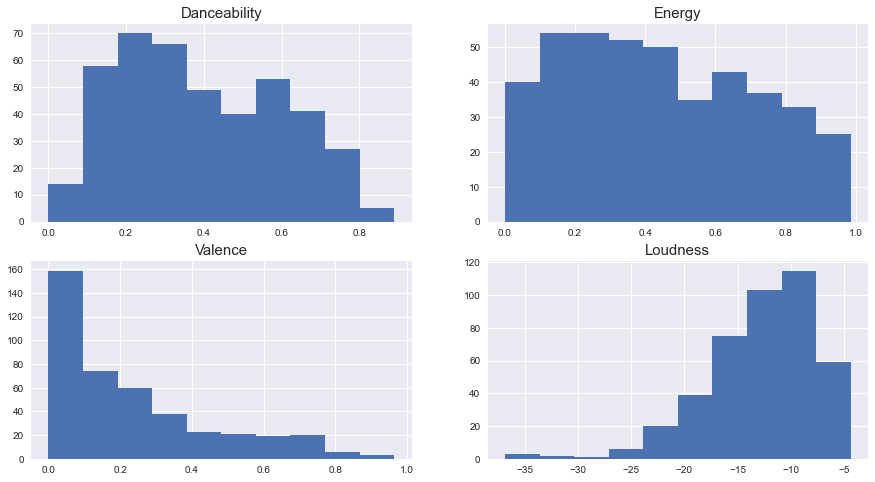

In [11]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [12]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,32.628842,0.395588,0.446771,0.236248,-12.805064
std,17.830344,0.203246,0.267740,0.221957,5.176817
min,0.000000,0.000000,0.000791,0.000000,-36.892000
25%,17.000000,0.228000,0.210000,0.047200,-15.899500
50%,33.000000,0.358000,0.420000,0.157000,-11.826000
75%,47.000000,0.563500,0.664500,0.345000,-8.801500
max,82.000000,0.890000,0.985000,0.964000,-4.345000


In [18]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [20]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [51]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

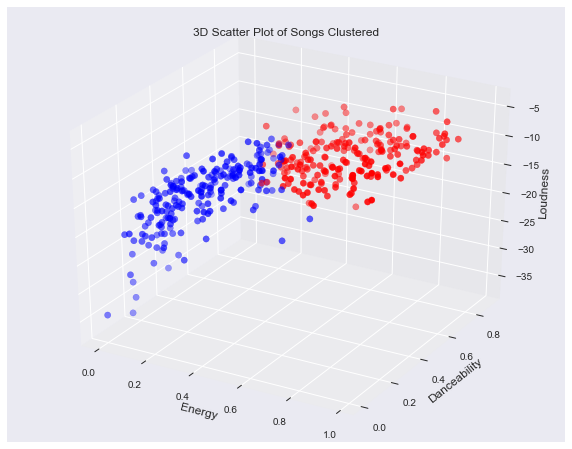

In [83]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [86]:
df.groupby(['kmeans']).mean()

,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,27.869159,0.270223,0.231584,0.10149,-15.858407
1,37.502392,0.523952,0.667105,0.37423,-9.678675


In [89]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [94]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)